# Convolutional Neural Networks

In this project we have a daset for detecting disease and plague in the crops by using a predictive model where we have to use a Convolutional Neural Networks.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import tensorflow as tf # setup ANN and save models
import cv2
import pickle

# get the list of files in directories
from os import listdir

# Keras Sequential Model
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
#from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
from sklearn.preprocessing import LabelBinarizer

# Importing all the different layers and optimizers for CNN
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam, SGD

# to ignore warnings along the code
import warnings
warnings.filterwarnings("ignore")

In [23]:
!pip install pyyaml h5py

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Especify a Parent directory where images are stored in drive
plants_disease_directory = '/content/drive/MyDrive/Colab Notebooks/Intership/PlantVillage'

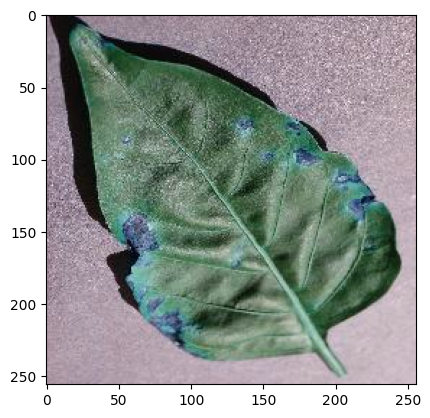

In [8]:
pepper_bell_directory='/Pepper__bell___Bacterial_spot/'
imagen = '00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG'
imagdir = plants_disease_directory + pepper_bell_directory + imagen
im2 = cv2.imread(imagdir)
window_name='image'
plt.imshow(im2);

Run in Notebook from here.

## 1. Pre-processing the data

In [9]:
default_image_size = tuple((256, 256)) #size of images
image_size = 0

## 2. Training of the model.

We need to divide the pictures by the dimensions or pixels of the images, which is: 255x255.

But first of all we will upload the numpy files of the images list and label list

In [3]:
#dir1='/content/drive/MyDrive/Colab Notebooks/Intership/'
#dir1=dir1+'list_images_file.npy'
#dir1

dir1='list_images_file.npy'

In [4]:
with open(dir1,'rb') as f:
    image_list = np.load(f)

In [6]:
image_list.shape

(2952, 256, 256, 3)

In [7]:
#dir2='/content/drive/MyDrive/Colab Notebooks/Intership/'
#dir2=dir2+'image_labels_file.npy'
#dir2

dir2='image_labels_file.npy'

In [8]:
with open(dir2,'rb') as f:
    image_labels = np.load(f)

In [9]:
image_labels.shape

(2952, 15)

### 2.1 Splitting the data: train and test set

In [11]:
image_list[0].shape #each image has the next dimension

(256, 256, 3)

In [12]:
image_list_normalized = np.array(image_list, dtype = np.float16)/255.0

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(image_list_normalized,
                                                    image_labels,
                                                    test_size=0.2,
                                                   random_state=42)

In [19]:
x_train.shape

(2361, 256, 256, 3)

In [20]:
x_train[0][0][0]

array([0.4353, 0.4548, 0.537 ], dtype=float16)

In [21]:
x_test.shape

(591, 256, 256, 3)

In [22]:
x_test[0][0][0]

array([0.9844, 0.9883, 0.9727], dtype=float16)

### 2.2 Building the model - Convolutional Neural Network
##### (CNN)

In [23]:
epochs = 15 #epochs to gradient descent algorithm
init_lr = 1e-2 #learning rate
BS = 32
default_image_size = tuple((256, 256)) #size of images
width = 256
height = 256
depth = 3

In [24]:
# Clearing the history backend of previous models
model=0
from tensorflow.keras import backend
backend.clear_session()

#### 2.2.1 Feature Extraction

In [25]:
model = Sequential()
model.add(Conv2D(64, (8,8), activation='relu', padding = "same", input_shape=(width, height, depth)))
model.add(MaxPooling2D((8,8), padding = 'same'))
model.add(Conv2D(32,(8,8), activation = "relu", padding = "same"))
model.add(MaxPooling2D((8,8), padding = "same"))
model.add(Flatten())

#### 2.2.2 Fully Connected Layer of Neural Network

In [26]:
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(15, activation = 'softmax'))
opt = SGD(learning_rate = init_lr, momentum = 0.9)

model.compile(optimizer = opt, loss="categorical_crossentropy", metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      12352     
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        131104    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 flatten_1 (Flatten)         (None, 512)               0

In [27]:
history = model.fit(
        x_train, y_train,
        epochs = epochs,
        validation_split = 0.1,
        shuffle = True,
        verbose = 2
)

Epoch 1/15
67/67 - 397s - loss: 2.7085 - accuracy: 0.0669 - val_loss: 2.6998 - val_accuracy: 0.0928 - 397s/epoch - 6s/step
Epoch 2/15
67/67 - 402s - loss: 2.6212 - accuracy: 0.1285 - val_loss: 2.4693 - val_accuracy: 0.1857 - 402s/epoch - 6s/step
Epoch 3/15
67/67 - 407s - loss: 2.1866 - accuracy: 0.2660 - val_loss: 2.1410 - val_accuracy: 0.3122 - 407s/epoch - 6s/step
Epoch 4/15
67/67 - 395s - loss: 1.8830 - accuracy: 0.3856 - val_loss: 1.9724 - val_accuracy: 0.3460 - 395s/epoch - 6s/step
Epoch 5/15
67/67 - 395s - loss: 1.6062 - accuracy: 0.4675 - val_loss: 1.4347 - val_accuracy: 0.4895 - 395s/epoch - 6s/step
Epoch 6/15
67/67 - 393s - loss: 1.2803 - accuracy: 0.5895 - val_loss: 1.2023 - val_accuracy: 0.6203 - 393s/epoch - 6s/step
Epoch 7/15
67/67 - 384s - loss: 1.1217 - accuracy: 0.6266 - val_loss: 1.0690 - val_accuracy: 0.6540 - 384s/epoch - 6s/step
Epoch 8/15
67/67 - 380s - loss: 0.8711 - accuracy: 0.7057 - val_loss: 0.9063 - val_accuracy: 0.7004 - 380s/epoch - 6s/step
Epoch 9/15
67/67

# 3. Saving the model and loading
We will use the model for any time in the future

In [60]:
#pip install --upgrade tensorflow==2.13

In [66]:
# Save the entire model as a `.keras` zip archive.
#filename = '/content/drive/MyDrive/Colab Notebooks/Intership/CNN_model.keras'
#from keras.src import layers
import tensorflow as tf 
import joblib
filename = './CNN_model.pkl'
#model.save(filename)

#filename = '/content/drive/MyDrive/Colab Notebooks/Intership/CNN_model.sav'
#pickle.dump(model, open(filename, 'wb'))

In [1]:
# Recreate the exact same model, including its weights and the optimizer
#loaded_model = tf.keras.models.load_model(filename)
#import joblib
#loaded_model = pickle.load(open(filename, 'rb'))
loaded_model = joblib.load(filename)

### Evaluation of the model

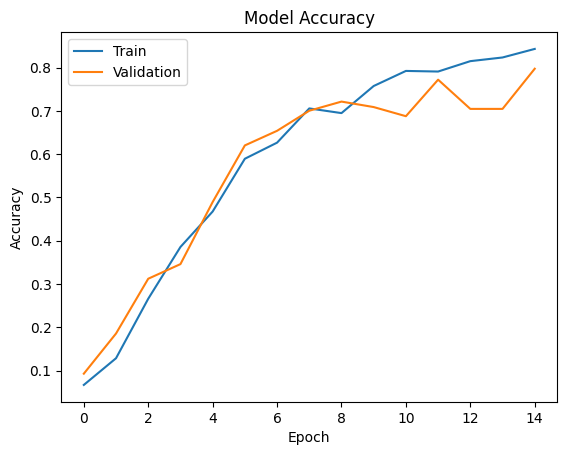

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train', "Validation"], loc="upper left")
plt.show()

The accuracy reachs more than 80% in train set and 79 % in validation set.

### Evaluation of the model

In [41]:
accuracy = loaded_model.evaluate(x_test, y_test, verbose=2)

19/19 - 32s - loss: 0.8715 - accuracy: 0.7547 - 32s/epoch - 2s/step


In [42]:
# Here we would get the output as probablities for each category
y_pred=loaded_model.predict(x_test)

19/19 [==============================] - 34s 2s/step


### Confusion Matrix

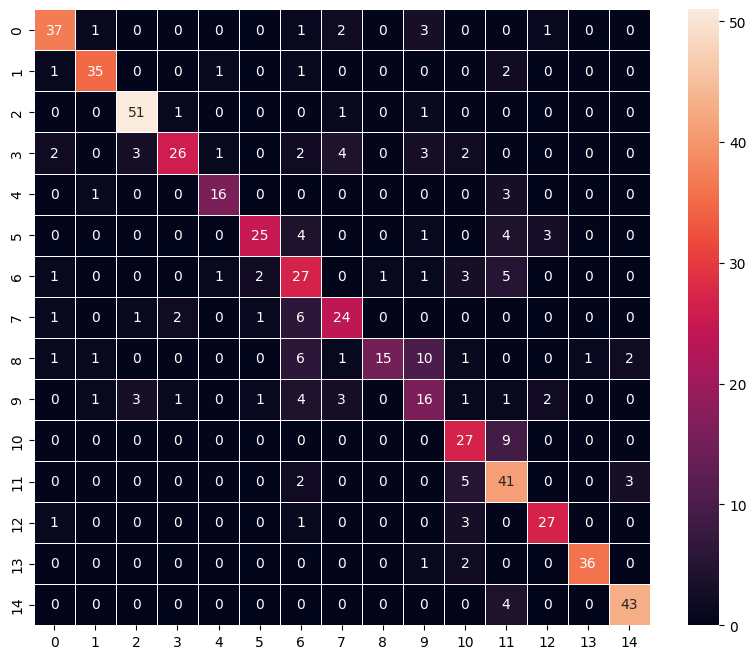

In [43]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

# 4. Testing the model with test set

 1. Pepper__bell___Bacterial_spot </br>
 2. Tomato_Late_blight </br>
 3. Tomato_Leaf_Mold </br>
 4. Potato___Early_blight </br>
 5. Potato___healthy </br>
 6. Pepper__bell___healthy </br>
 7. Potato___Late_blight </br>
 8. Tomato_healthy </br>
 9. Tomato_Bacterial_spot </br>
 10. Tomato_Early_blight </br>
 11. Tomato__Target_Spot </br>
 12. Tomato_Septoria_leaf_spot </br>
 13. Tomato_Spider_mites_Two_spotted_spider_mite </br>
 14. Tomato__Tomato_YellowLeaf__Curl_Virus </br>
 15. Tomato__Tomato_mosaic_virus

#### Testing the 502th image

In [3]:
y_test[501]

In [90]:
y_pred[501].round().astype('int')

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Testing the 22th image

In [85]:
y_test[21]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [86]:
y_pred[21].round().astype('int')

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Testing the 187th image

In [78]:
y_test[186]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [83]:
y_pred[186].round().astype('int')

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])